In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c digit-recognizer

'New-Item' is not recognized as an internal or external command,
operable program or batch file.


'Copy-Item' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hasan\AppData\Local\Programs\Python\Python311\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\__init__.py", line 6, in <module>
    api.authenticate()
  File "C:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\hasan\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [6]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
y = np.array(data_train['label']).reshape(1,-1)
print(y)
X = np.array(data_train.drop('label',axis = 1))
X = X/255
n,m = X.shape
print(m)

[[1 0 1 ... 7 6 9]]
784


In [4]:
# one hot encoding the ground truths
print(y.ravel())
y_onehot = np.array(pd.get_dummies(y.ravel()).astype(int))
print(y_onehot.shape)

[1 0 1 ... 7 6 9]
(42000, 10)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=40)
print(y_train[9])
print(np.argmax(y_train,axis = 1))
print(y_train.shape)
print(X_test.shape)

[0 0 0 0 1 0 0 0 0 0]
[7 8 6 ... 8 2 1]
(31500, 10)
(10500, 784)


In [6]:
class layer_dense:
    def __init__(self,n_inputs,n_neurons,activation_fn):
        self.fn = activation_fn
        self.weights = 0.1 * np.random.randn(n_inputs,n_neurons)#ensure they are between -1 to 1 top prevent explosion
        self.biases = np.random.randn(1,n_neurons)

    
    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.dot(self.inputs,self.weights) + self.biases
        if (self.fn == 'ReLU'):
            self.active_output = np.maximum(0,self.output)
        elif (self.fn == 'softmax'):
            exp_values = np.exp(self.output - np.max(self.output, axis=1, keepdims=True))
            self.active_output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [7]:
layer = layer_dense(784,128,'ReLU')
layer.forward(X_train)
# print(layer.soft_output[0,:])
layer1 = layer_dense(128,10,'softmax')
layer1.forward(layer.active_output)
print(layer.output.shape)
print(np.max(layer.output[0]))
print(np.max(layer.output,axis = 1,keepdims = True))
print(y_train.shape)
print(layer1.active_output.shape)
print(np.sum(layer.output,axis = 1,keepdims = True).shape)

(31500, 128)
3.2547289762505183
[[3.25472898]
 [3.19617784]
 [2.67466988]
 ...
 [2.47066134]
 [3.69602814]
 [2.32413947]]
(31500, 10)
(31500, 10)
(31500, 1)


In [8]:
def ReLU_deriv(Z):
    return (Z > 0).astype(float)
def accuracy(A2,Y):
    y_pred = np.argmax(A2,axis = 1)
    print(Y)
    print(y_pred)
    return np.sum(y_pred == Y)/Y.shape[0]
print(y_train.shape)

(31500, 10)


In [9]:
def backprop(W1,B1,Z1,A1,W2,B2,Z2,A2,X,Y,alpha,epochs):
    print(W2.shape)
    print(W1.shape)
    m = X.shape[1]
    for i in range(epochs):
        dZ2 = A2 - Y
        dW2 = 1/m * np.dot(A1.T,dZ2)
        dB2 = 1/m * np.sum(dZ2,axis =0, keepdims = True)
        dZ1 = np.dot(dZ2,W2.T) * ReLU_deriv(Z1)
        dW1 = 1/m * np.dot(X.T,dZ1)
        dB1 = 1/m * np.sum(dZ1,axis = 0, keepdims = True)

        # print(dW1, dB1, dW2, dB2)
        W1 = W1 - alpha * dW1
        B1 = B1 - alpha * dB1    
        W2 = W2 - alpha * dW2  
        B2 = B2 - alpha * dB2

        layer.weights = W1
        layer1.weights = W2
        layer.biases = B1
        layer1.biases = B2
        
        layer.forward(X_train)
        layer1.forward(layer.active_output)
        Z1 = layer.output
        Z2 = layer1.output
        A1 = layer.active_output
        A2 = layer1.active_output
        if i % 10 == 0 :
            acc = accuracy(A2,np.argmax(y_train,axis = 1))
            print(acc)

In [10]:
backprop(layer.weights,layer.biases,layer.output,layer.active_output,layer1.weights,layer1.biases,layer1.output,layer1.active_output,X_train,y_train,0.01,100)

(128, 10)
(784, 128)
[7 8 6 ... 8 2 1]
[8 6 6 ... 8 8 8]
0.18698412698412697
[7 8 6 ... 8 2 1]
[7 8 6 ... 1 2 1]
0.7998095238095239
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.7457460317460317
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.8735873015873016
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.8866666666666667
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.894984126984127
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.8999365079365079
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9040952380952381
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9077460317460317
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9107936507936508


In [11]:
backprop(layer.weights,layer.biases,layer.output,layer.active_output,layer1.weights,layer1.biases,layer1.output,layer1.active_output,X_train,y_train,0.01,100)

(128, 10)
(784, 128)
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9140952380952381
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9167936507936508
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9196190476190477
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9215238095238095
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9231428571428572
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9250158730158731
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9268253968253968
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9288571428571428
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9308253968253968
[7 8 6 ... 8 2 1]
[7 8 6 ... 8 2 1]
0.9323492063492064


In [12]:
layer.forward(X_test)
layer1.forward(layer.active_output)
acc = accuracy(layer1.active_output,np.argmax(y_test,axis = 1))
print(acc)

[0 2 1 ... 6 2 2]
[0 2 1 ... 6 2 2]
0.92


In [22]:
test1 = np.array(data_test[])
print(test1.shape)

(28000, 784)


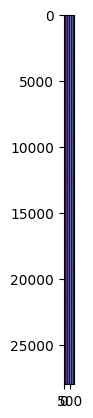

In [23]:
plt.imshow(test1.reshape())